# Stock Price Prediction using LSTM by `Mr. Harshit Dawar`

## Importing the required Packages!

In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Dataset

In [20]:
data = pd.read_csv("stockdata.csv")

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [5]:
data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,48.344296,48.717212,47.956827,48.352246,9.230517e+06
std,10.389108,10.458485,10.304082,10.391867,4.382209e+06
min,26.535000,26.820000,26.260000,26.605000,2.215418e+06
25%,38.372500,38.690650,38.087750,38.355000,6.661026e+06
50%,53.520000,53.995000,53.180000,53.540000,8.138313e+06
75%,57.270000,57.735000,56.850000,57.360000,1.059388e+07
max,64.850000,64.870000,64.180000,64.570000,5.345479e+07


### Using the wrong way to predict the stock prices(this way is most followed way, which is actually wrong)!


In [6]:
# Taking only high data for demonstration purpose!
timeSeries = data["high"].values.reshape(-1, 1)

In [7]:
timeSeries.shape

(1259, 1)

In [8]:
# Normalizing the data (Fitting only half series & transforming the complete series)
# This is the use case & difference b/w using fit_transofrm() & using fit & transform seperately
scaler = StandardScaler().fit(timeSeries[: timeSeries.shape[0] // 2])
timeSeries = scaler.transform(timeSeries)

In [9]:
timeSeries.shape

(1259, 1)

In [10]:
timeSeriesData = []
forecast = []
sequenceLength = 15
Dimesnsion = timeSeries.shape[1]

for sequence in range(len(timeSeries) - sequenceLength):
    timeSeriesData.append(
        timeSeries[sequence : sequence + sequenceLength]
    )
    forecast.append(
        timeSeries[sequence + sequenceLength]
    )
    
timeSeriesData, forecast = np.array(timeSeriesData), np.array(forecast)

In [11]:
timeSeriesData.shape

(1244, 15, 1)

In [12]:
# Just playing with shapes (This cell has no relation with the project!)
timeSeriesData.reshape(-1, sequenceLength, 2).shape

(622, 15, 2)

In [13]:
inputShape = Input(shape = (sequenceLength, Dimesnsion))
LayerStack = LSTM(9)(inputShape)
LayerStack = Dense(1)(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.summary()

LSTMModel.compile(optimizer="adam", loss="mse")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 9)                 396       
_________________________________________________________________
dense (Dense)                (None, 1)                 10        
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [14]:
limit = timeSeriesData.shape[0] // 2
trainedModel = LSTMModel.fit(timeSeriesData[ : limit],
                             forecast[ : limit],
                             epochs = 200,
                             validation_data = (timeSeriesData[ limit : ],
                                                forecast[ limit : ]
                             )
                            )

Train on 622 samples, validate on 622 samples
Epoch 1/200
622/622 [==============================] - 13s 20ms/sample - loss: 0.5825 - val_loss: 3.2017
Epoch 2/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.3739 - val_loss: 2.2967
Epoch 3/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.2525 - val_loss: 1.6913
Epoch 4/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.1912 - val_loss: 1.3221
Epoch 5/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.1561 - val_loss: 1.1024
Epoch 6/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.1336 - val_loss: 0.9592
Epoch 7/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.1162 - val_loss: 0.8568
Epoch 8/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0992 - val_loss: 0.7926
Epoch 9/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0842 - val_loss: 0.7396
Epoch 10/200
622/622 [===

622/622 [==============================] - 1s 2ms/sample - loss: 0.0068 - val_loss: 0.0387
Epoch 80/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0067 - val_loss: 0.0387
Epoch 81/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0067 - val_loss: 0.0384
Epoch 82/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0067 - val_loss: 0.0385
Epoch 83/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0067 - val_loss: 0.0383
Epoch 84/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0068 - val_loss: 0.0385
Epoch 85/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0066 - val_loss: 0.0380
Epoch 86/200
622/622 [==============================] - 1s 2ms/sample - loss: 0.0066 - val_loss: 0.0378
Epoch 87/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0066 - val_loss: 0.0375
Epoch 88/200
622/622 [==============================] - 1s 1ms/sample - loss:

622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0304
Epoch 158/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0053 - val_loss: 0.0294
Epoch 159/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0052 - val_loss: 0.0293
Epoch 160/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0052 - val_loss: 0.0293
Epoch 161/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0291
Epoch 162/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0289
Epoch 163/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0287
Epoch 164/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0289
Epoch 165/200
622/622 [==============================] - 1s 1ms/sample - loss: 0.0051 - val_loss: 0.0289
Epoch 166/200
622/622 [==============================] - 1s 1ms/sampl

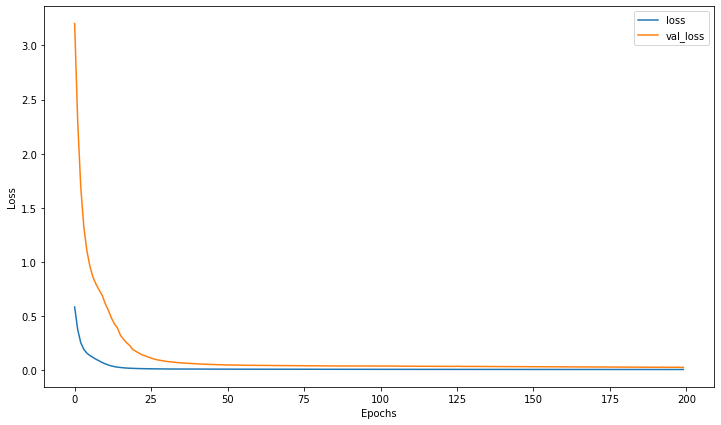

In [15]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

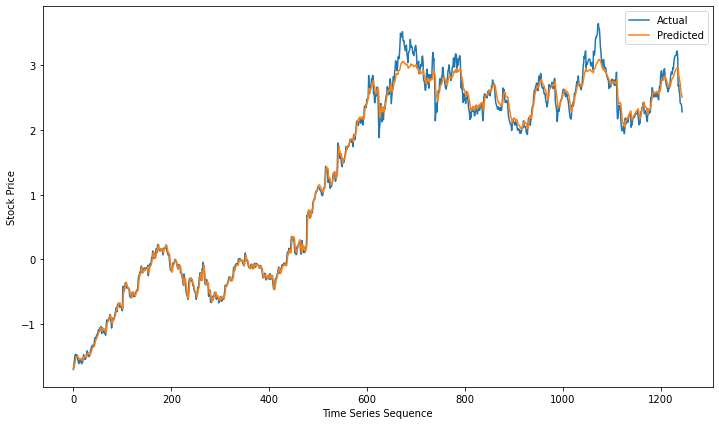

In [16]:
# Wrong forecast approach
plt.figure(figsize = (12, 7))
plt.plot(forecast, label = "Actual")
plt.plot(LSTMModel.predict(timeSeriesData), label = "Predicted")
plt.xlabel("Time Series Sequence")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

***Above graph looks very promising, but in reality this approach never helps!***

In [17]:
# Right Forecast Approach
predictions = []
last_value = timeSeriesData[0]

while len(predictions) < len(forecast):
        temp = LSTMModel.predict(last_value.reshape(1, sequenceLength, 1))[0, 0]
        predictions.append(temp)
        
        last_value = np.roll(last_value, -1)
        last_value[-1] = temp

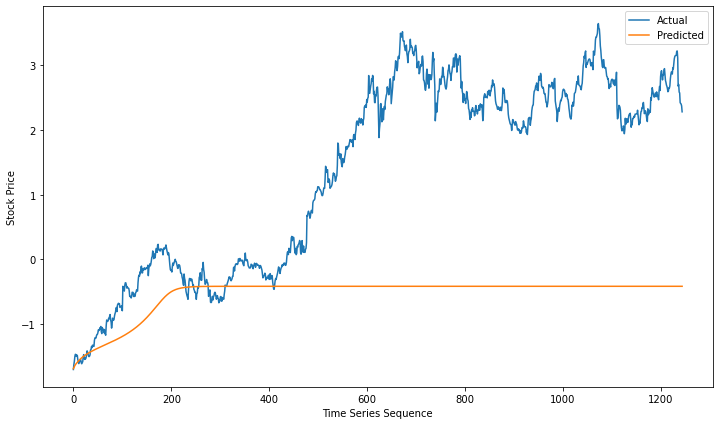

In [18]:
plt.figure(figsize = (12, 7))
plt.plot(forecast, label = "Actual")
plt.plot(predictions, label = "Predicted")
plt.xlabel("Time Series Sequence")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Using the Righ Approach for dealing with Stock Data
* In realtiy, instead of stock price, stock return has to be calculated i.e. (final price - initial price) / initial price

In [21]:
# Shifting everything up by 1 position.
data["previousHigh"] = data.high.shift(1)
data.head()

,date,open,high,low,close,volume,Name,previousHigh
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.325
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.260
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.275
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,28.230


In [22]:
data["Return"] = (data.high - data.previousHigh) / data.previousHigh

In [23]:
data.head()

,date,open,high,low,close,volume,Name,previousHigh,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.325,-0.002295
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.260,0.000531
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.275,-0.001592
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,28.230,-0.011513


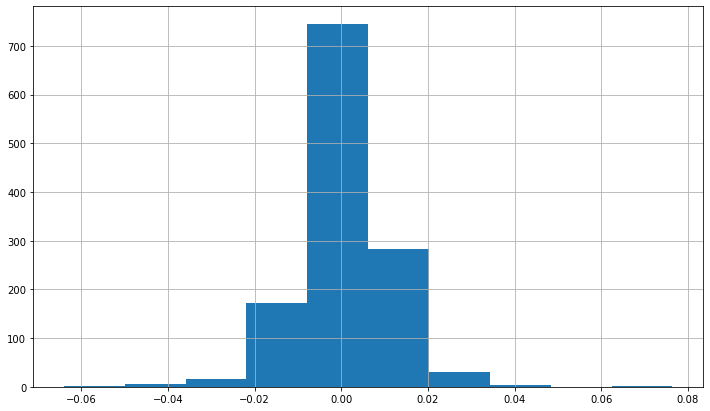

In [25]:
plt.figure(figsize = (12, 7))
plt.hist(data.Return)
plt.grid()
plt.show()

In [36]:
# Normalizing the Values again
timeSeries = data.Return.values[1:].reshape(-1, 1) # Making 2D array for Standard Scaler Fitting

In [37]:
timeSeries.shape, type(timeSeries)

((1258, 1), numpy.ndarray)

In [38]:
scaler = StandardScaler().fit(timeSeries[ : len(timeSeries) // 2])
timeSeries = scaler.transform(timeSeries)

In [39]:
timeSeries.shape

(1258, 1)

In [40]:
timeSeriesData = []
forecast = []
sequenceLength = 15
Dimesnsion = timeSeries.shape[1]

for sequence in range(len(timeSeries) - sequenceLength):
    timeSeriesData.append(
        timeSeries[sequence : sequence + sequenceLength]
    )
    forecast.append(
        timeSeries[sequence + sequenceLength]
    )
    
timeSeriesData, forecast = np.array(timeSeriesData), np.array(forecast)

In [42]:
timeSeriesData.shape

(1243, 15, 1)

In [44]:
inputShape = Input(shape = (sequenceLength, Dimesnsion))
LayerStack = LSTM(9)(inputShape)
LayerStack = Dense(1)(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.summary()

LSTMModel.compile(optimizer="adam", loss="mse")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9)                 396       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [45]:
limit = timeSeriesData.shape[0] // 2
trainedModel = LSTMModel.fit(timeSeriesData[ : limit],
                             forecast[ : limit],
                             epochs = 200,
                             validation_data = (timeSeriesData[ limit : ],
                                                forecast[ limit : ]
                             )
                            )

Train on 621 samples, validate on 622 samples
Epoch 1/200
621/621 [==============================] - 7s 11ms/sample - loss: 0.9979 - val_loss: 1.0363
Epoch 2/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9947 - val_loss: 1.0371
Epoch 3/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9925 - val_loss: 1.0355
Epoch 4/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9911 - val_loss: 1.0350
Epoch 5/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9900 - val_loss: 1.0372
Epoch 6/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9902 - val_loss: 1.0350
Epoch 7/200
621/621 [==============================] - 1s 2ms/sample - loss: 0.9891 - val_loss: 1.0356
Epoch 8/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9880 - val_loss: 1.0371
Epoch 9/200
621/621 [==============================] - 1s 2ms/sample - loss: 0.9878 - val_loss: 1.0391
Epoch 10/200
621/621 [====

621/621 [==============================] - 1s 1ms/sample - loss: 0.9607 - val_loss: 1.0547
Epoch 80/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9597 - val_loss: 1.0543
Epoch 81/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9618 - val_loss: 1.0579
Epoch 82/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9606 - val_loss: 1.0607
Epoch 83/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9612 - val_loss: 1.0581
Epoch 84/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9590 - val_loss: 1.0602
Epoch 85/200
621/621 [==============================] - 1s 2ms/sample - loss: 0.9578 - val_loss: 1.0623
Epoch 86/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9564 - val_loss: 1.0651
Epoch 87/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9561 - val_loss: 1.0632
Epoch 88/200
621/621 [==============================] - 1s 1ms/sample - loss:

621/621 [==============================] - 1s 1ms/sample - loss: 0.9136 - val_loss: 1.1171
Epoch 158/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9145 - val_loss: 1.1113
Epoch 159/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9123 - val_loss: 1.1158
Epoch 160/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9133 - val_loss: 1.1139
Epoch 161/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9115 - val_loss: 1.1128
Epoch 162/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9110 - val_loss: 1.1152
Epoch 163/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9115 - val_loss: 1.1130
Epoch 164/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9140 - val_loss: 1.1265
Epoch 165/200
621/621 [==============================] - 1s 1ms/sample - loss: 0.9117 - val_loss: 1.1101
Epoch 166/200
621/621 [==============================] - 1s 1ms/sampl

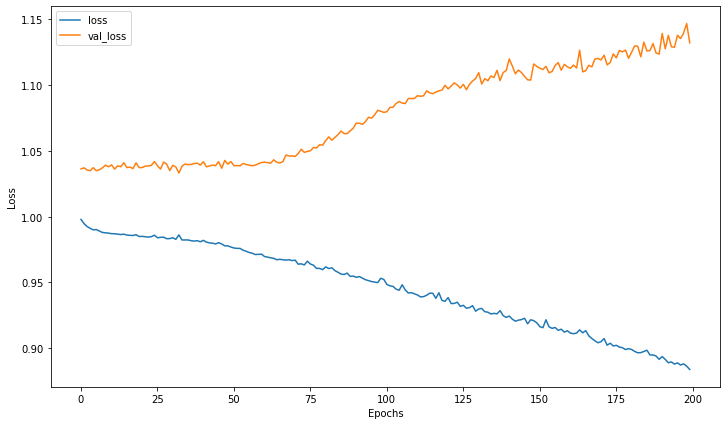

In [46]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

***Above Graph Shows UnderFitting of the Model!***

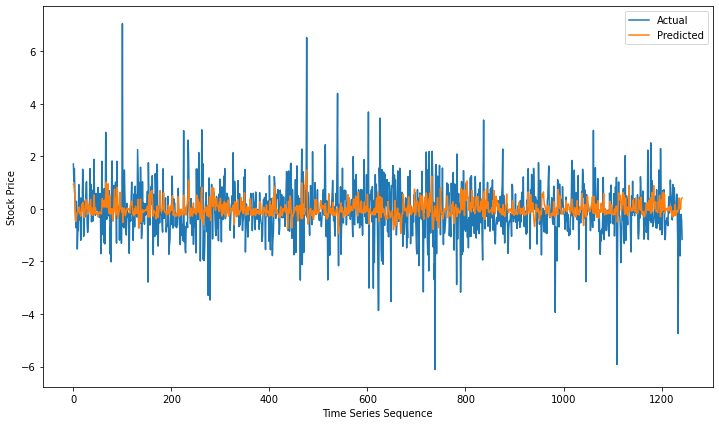

In [47]:
# Wrong forecast approach
plt.figure(figsize = (12, 7))
plt.plot(forecast, label = "Actual")
plt.plot(LSTMModel.predict(timeSeriesData), label = "Predicted")
plt.xlabel("Time Series Sequence")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [48]:
# Right Forecast Approach
predictions = []
last_value = timeSeriesData[0]

while len(predictions) < len(forecast):
        temp = LSTMModel.predict(last_value.reshape(1, sequenceLength, 1))[0, 0]
        predictions.append(temp)
        
        last_value = np.roll(last_value, -1)
        last_value[-1] = temp

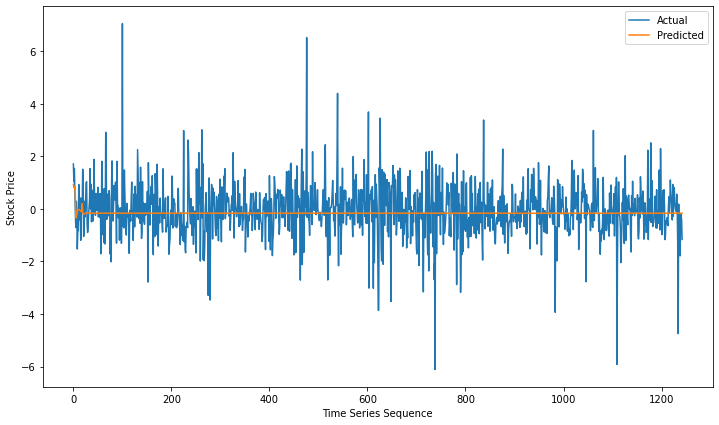

In [49]:
plt.figure(figsize = (12, 7))
plt.plot(forecast, label = "Actual")
plt.plot(predictions, label = "Predicted")
plt.xlabel("Time Series Sequence")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Building a Classification Model(predicting increase/decrease in stock price) using all the stock values 

In [61]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'previousHigh', 'Return'],
      dtype='object')

In [67]:
newData = data.drop(["Name", "Return", "previousHigh", "date"], axis = 1).values
Target = data.Return.values

In [73]:
newData[0], newData.shape, Target.shape

(array([2.792000e+01, 2.832500e+01, 2.792000e+01, 2.818500e+01,
        7.146296e+06]),
 (1259, 5),
 (1259,))

In [112]:
sequenceLength = 15
Dimesnsion = newData.shape[1]
Number_Of_Samples = len(newData) - sequenceLength 

In [113]:
# Normalizing the Data & making first 2/3 part of Data as Training Data
TrainDataLength = newData.shape[0] * 2 // 3
scaler = StandardScaler().fit(newData[ : TrainDataLength + sequenceLength])
TrainData = scaler.transform(newData)

In [114]:
TrainData.shape, Number_Of_Samples

((1259, 5), 1244)

In [115]:
# Creating Training & Testing Data
x_train, y_train = np.ones(shape = (TrainDataLength,
                                    sequenceLength,
                                    Dimesnsion)), np.ones(shape = (TrainDataLength))

for sequence in range(TrainDataLength):
    x_train[sequence, :, :] = TrainData[sequence : sequence + sequenceLength]
    y_train[sequence] = Target[sequence + sequenceLength] > 0 # Assigning Boolean Values
    
x_test, y_test = np.ones(shape = (Number_Of_Samples - TrainDataLength,
                                  sequenceLength,
                                  Dimesnsion)), np.ones(shape = (Number_Of_Samples - TrainDataLength))

for sequence in range(Number_Of_Samples - TrainDataLength):
    testing_Sequence_Number = sequence + TrainDataLength
    x_test[sequence, :, :] = TrainData[testing_Sequence_Number : testing_Sequence_Number + sequenceLength]
    y_test[sequence] = Target[testing_Sequence_Number + sequenceLength] > 0 # Assigning Boolean Values

In [116]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((839, 15, 5), (839,), (405, 15, 5), (405,))

In [117]:
inputShape = Input(shape = (sequenceLength, Dimesnsion))
LayerStack = LSTM(55)(inputShape)
LayerStack = Dense(1, activation = "sigmoid")(LayerStack)

LSTMModel = Model(inputShape, LayerStack)
LSTMModel.summary()

LSTMModel.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 15, 5)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                13420     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
Total params: 13,476
Trainable params: 13,476
Non-trainable params: 0
_________________________________________________________________


In [118]:
trainedModel = LSTMModel.fit(x_train,
                             y_train,
                             epochs = 200,
                             validation_data = (x_test,
                                                y_test
                             )
                            )

Train on 839 samples, validate on 405 samples
Epoch 1/200
839/839 [==============================] - 7s 8ms/sample - loss: 0.6956 - accuracy: 0.5006 - val_loss: 0.6920 - val_accuracy: 0.5383
Epoch 2/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.6898 - accuracy: 0.5423 - val_loss: 0.7036 - val_accuracy: 0.4691
Epoch 3/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.6892 - accuracy: 0.5280 - val_loss: 0.6973 - val_accuracy: 0.4691
Epoch 4/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.6892 - accuracy: 0.5352 - val_loss: 0.7007 - val_accuracy: 0.4741
Epoch 5/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.6865 - accuracy: 0.5435 - val_loss: 0.7015 - val_accuracy: 0.4642
Epoch 6/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.6852 - accuracy: 0.5459 - val_loss: 0.6976 - val_accuracy: 0.4667
Epoch 7/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.6894 

Epoch 57/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.6019 - accuracy: 0.6651 - val_loss: 0.7126 - val_accuracy: 0.5037
Epoch 58/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.5936 - accuracy: 0.6794 - val_loss: 0.7131 - val_accuracy: 0.5012
Epoch 59/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.5852 - accuracy: 0.6841 - val_loss: 0.7172 - val_accuracy: 0.5160
Epoch 60/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.5889 - accuracy: 0.6675 - val_loss: 0.7114 - val_accuracy: 0.5086
Epoch 61/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.5952 - accuracy: 0.6746 - val_loss: 0.7171 - val_accuracy: 0.5012
Epoch 62/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.5788 - accuracy: 0.6806 - val_loss: 0.7128 - val_accuracy: 0.4914
Epoch 63/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.5787 - accuracy: 0.6722 - val_loss: 0.7054 -

839/839 [==============================] - 1s 2ms/sample - loss: 0.4417 - accuracy: 0.7819 - val_loss: 0.7716 - val_accuracy: 0.4593
Epoch 114/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.4460 - accuracy: 0.7819 - val_loss: 0.7600 - val_accuracy: 0.4864
Epoch 115/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.4321 - accuracy: 0.7819 - val_loss: 0.7461 - val_accuracy: 0.4568
Epoch 116/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.4395 - accuracy: 0.7795 - val_loss: 0.7795 - val_accuracy: 0.4741
Epoch 117/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.4329 - accuracy: 0.7843 - val_loss: 0.7978 - val_accuracy: 0.4741
Epoch 118/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.4384 - accuracy: 0.7783 - val_loss: 0.7497 - val_accuracy: 0.4741
Epoch 119/200
839/839 [==============================] - 1s 2ms/sample - loss: 0.4322 - accuracy: 0.7831 - val_loss: 0.7805 - val_ac

Epoch 169/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.3092 - accuracy: 0.8522 - val_loss: 0.8798 - val_accuracy: 0.4765
Epoch 170/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.2971 - accuracy: 0.8546 - val_loss: 0.8779 - val_accuracy: 0.4938
Epoch 171/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.3041 - accuracy: 0.8486 - val_loss: 0.9073 - val_accuracy: 0.4815
Epoch 172/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.3160 - accuracy: 0.8451 - val_loss: 0.8964 - val_accuracy: 0.4815
Epoch 173/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.3069 - accuracy: 0.8522 - val_loss: 0.9016 - val_accuracy: 0.4741
Epoch 174/200
839/839 [==============================] - 1s 1ms/sample - loss: 0.3608 - accuracy: 0.8319 - val_loss: 0.9192 - val_accuracy: 0.4889
Epoch 175/200
839/839 [==============================] - 2s 2ms/sample - loss: 0.3326 - accuracy: 0.8427 - val_loss: 0

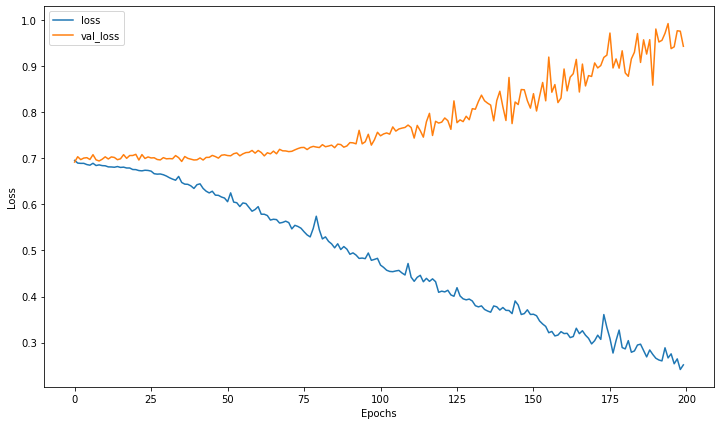

In [119]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["loss"], label = "loss")
plt.plot(trainedModel.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

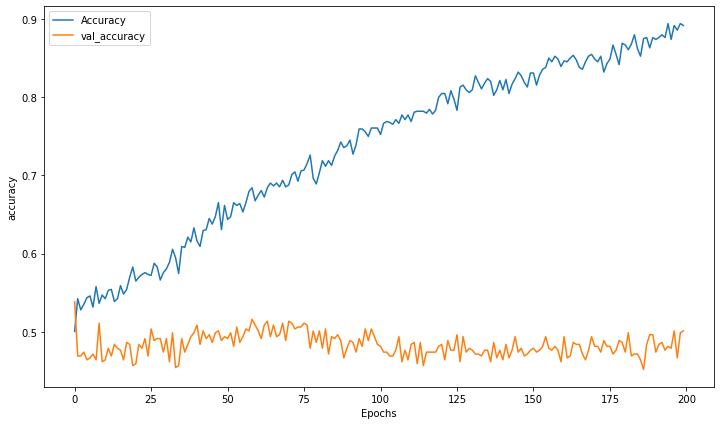

In [120]:
plt.figure(figsize = (12, 7))
plt.plot(trainedModel.history["accuracy"], label = "Accuracy")
plt.plot(trainedModel.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

***Every Approach & Graph above shows that, it is not possible to create a model to predict the correct stock prices because the model is not even able to just do the classification of 2 categories which is very easy than regession. In reality, it is also a fact because, stock prices depend on the unusual events & company's Image!***